In [43]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [44]:
# Getting the data in a dataframe
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [45]:
print(df.isnull().sum())  # checking for any null entries in the dataset

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

1a. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [46]:
delhi_ncr = ['Faridabad','Ghaziabad','Gurgaon','New Delhi','Noida']   # City in delhi_ncr
indian_restaurants = df[df['Country Code']==1]                        # finding restaurants in india
d_ncr_rest = indian_restaurants[(indian_restaurants['City'].isin(delhi_ncr))]  # finding restaurants in delhi ncr
roi_rest = indian_restaurants[(indian_restaurants['City'].isin(delhi_ncr)==False)] # finding restaurants in rest of india

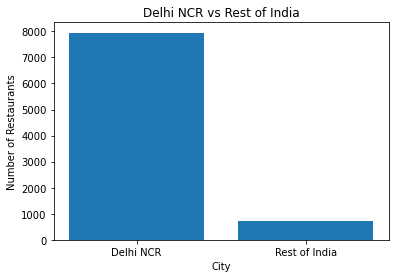

In [42]:
d_ncr_count,roi_count = d_ncr_rest.shape[0],roi_rest.shape[0]
# Plotting bar graph for Delhi NCR vs Rest of India
plt.title('Delhi NCR vs Rest of India')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.bar(['Delhi NCR','Rest of India'],[d_ncr_count,roi_count])
plt.show()

1b. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [78]:
d_ncr_cuisine = d_ncr_rest['Cuisines']
roi_cuisine = roi_rest['Cuisines']
d_ncr_set, roi_set = set(),set()

# finding cuisines in Delhi NCR
for cuisines in d_ncr_cuisine:
    for cuisine in cuisines.split(','):
        d_ncr_set.add(cuisine.strip())
        
#finding cuisines in Rest of India
for cuisines in roi_cuisine:
    for cuisine in cuisines.split(','):
        roi_set.add(cuisine.strip())
set_diff = roi_set.difference(d_ncr_set) # cuisines which is present in Rest of India but not in Delhi NCR(Using Dataset)
print('Cuisines which is present in Rest of India but not in Delhi NCR(Using Dataset): ')
print(*set_diff,sep="\n")

Cuisines which is present in Rest of India but not in Delhi NCR(Using Dataset): 
Malwani
German
BBQ
Cajun


In [79]:
# finding the cuisines in Delhi NCR using Zomato API
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   headers={"Accept": "application/json","user-key":"f243e3020e13a74ac2b77c51dcb94a04"},
                   params={'city_id':1}).json()
d_ncr_list=set()
for cus in res['cuisines']:
    d_ncr_list.add(cus['cuisine']['cuisine_name'])
set_diff1 = roi_set.difference(d_ncr_list)
print('Cuisines which is present in Rest of India but not in Delhi NCR(Using API): ')
print(*set_diff1,sep="\n")

Cuisines which is present in Rest of India but not in Delhi NCR(Using API): 
Cajun
German
Charcoal Grill
Indian


1c. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [97]:
ncr_cuis_dict={}
for cuisines in d_ncr_cuisine:
    for cuisine in cuisines.split(','):
        cuis = cuisine.strip()
        ncr_cuis_dict[cuis] = ncr_cuis_dict.get(cuis,0)+1
sorted_ncr = sorted(ncr_cuis_dict.items(),key = lambda x: -x[1])[:10]  # Finding top 10 cuisines by their frequency in Delhi NCR
sorted_ncr_cuis = [cuis[0] for cuis in sorted_ncr]
print('Top 10 cuisines by their frequency in Delhi NCR:')
print(*sorted_ncr_cuis,sep="\n")
print()

roi_cuis_dict={}
for cuisines in roi_cuisine:
    for cuisine in cuisines.split(','):
        cuis = cuisine.strip()
        roi_cuis_dict[cuis] = roi_cuis_dict.get(cuis,0)+1
# Finding top 10 cuisines by their frequency in Rest of India
sorted_roi = sorted(roi_cuis_dict.items(),key = lambda x: -x[1])
sorted_roi_cuis = [cuis[0] for cuis in sorted_roi[:10]]
print('Top 10 cuisines by their frequency in Rest of India:')
print(*sorted_roi_cuis,sep="\n")

Top 10 cuisines by their frequency in Delhi NCR:
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian

Top 10 cuisines by their frequency in Rest of India:
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


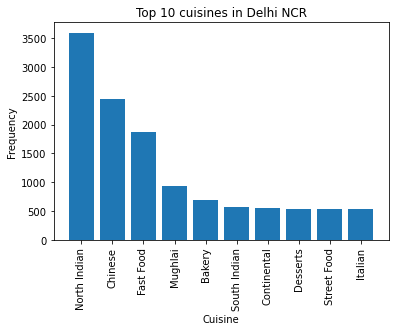

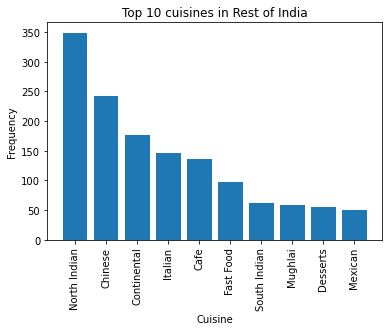

In [101]:
sorted_ncr_freq = [cuis[1] for cuis in sorted_ncr[:10]]
sorted_roi_freq = [cuis[1] for cuis in sorted_roi[:10]]
# Top 10 Cuisines in Delhi NCR
plt.title('Top 10 cuisines in Delhi NCR')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.bar(sorted_ncr_cuis,sorted_ncr_freq)
plt.xticks(rotation=90)
plt.show()

# Top 10 cuisines in Rest of India
plt.title('Top 10 cuisines in Rest of India')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.bar(sorted_roi_cuis,sorted_roi_freq)
plt.xticks(rotation=90)
plt.show()

2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

2.1) Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

2.1.1) Number of Votes given Restaurant

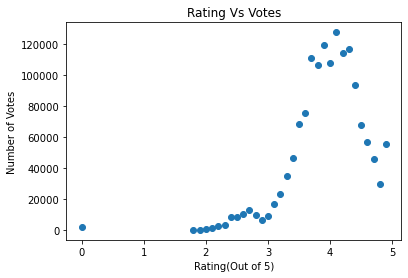

In [130]:
df1 = df.sort_values(by=['Votes'],ascending=False)
rating_votes = df1[['Aggregate rating','Votes']]
r_v={}
rat,vot=[],[]
for i in rating_votes.values:
    r_v[i[0]]=r_v.get(i[0],0)+int(i[1])
for key,val in r_v.items():
    rat.append(key)
    vot.append(val)
plt.scatter(rat,vot)
plt.xlabel('Rating(Out of 5)')
plt.ylabel('Number of Votes')
plt.title('Rating Vs Votes')
plt.show()

2.2.2) Restaurant serving more number of cuisines.

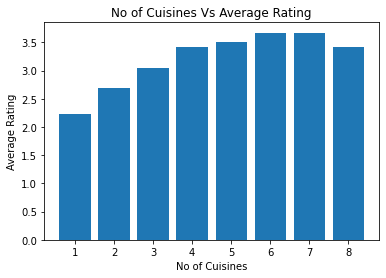

In [33]:
rating_cus = df[['Aggregate rating','Cuisines']]
rating_cus = rating_cus[rating_cus['Cuisines'].isnull()==False]
rat_cus={}
rat_cus_l={}
n_dish,rat=[],[]
for rating,cus in rating_cus.values:
    cus_l=len(cus.split(','))
    rat_cus[cus_l]=rat_cus.get(cus_l,0)+rating
    rat_cus_l[cus_l]=rat_cus_l.get(cus_l,0)+1
for key in rat_cus.keys():
    rat_cus[key]=rat_cus[key]/rat_cus_l[key]
    n_dish.append(key)
    rat.append(rat_cus[key])
plt.title('No of Cuisines Vs Average Rating')
plt.xlabel('No of Cuisines')
plt.ylabel('Average Rating')
plt.bar(n_dish,rat)
plt.show()

2.2.3) Average Cost of Restaurant

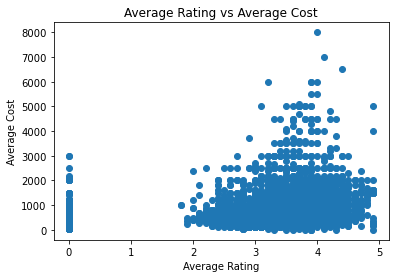

In [57]:
# checking only for indian restaurats because price may fluctuate for countries based on value of its currency
rating_cost = indian_restaurants[['Aggregate rating','Average Cost for two']]
rat,cos=[],[]
for rating,cost in rating_cost.values:
    rat.append(rating)
    cos.append(cost)
for key,val in rat_cost.items():
    rat.append(key)
    cos.append(val/rat_cost_l[key])
plt.title('Average Rating vs Average Cost')
plt.xlabel('Average Rating')
plt.ylabel('Average Cost')
plt.scatter(rat,cos)
plt.show()

2.2.4) Restaurant serving some specific cuisines.

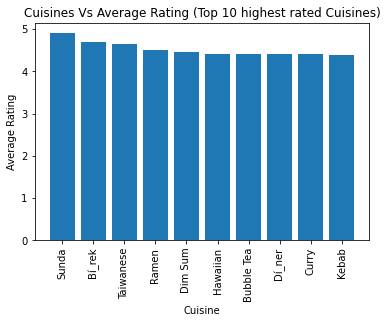

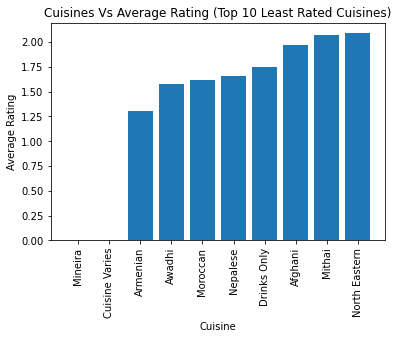

In [71]:
rating_cus = df[['Aggregate rating','Cuisines']]
rating_cus = rating_cus[rating_cus['Cuisines'].isnull()==False]
rat_cus={}
rat_cus_l={}
for rating,cus in rating_cus.values:
    for c in cus.split(','):
        c=c.strip()
        rat_cus[c]=rat_cus.get(c,0)+rating
        rat_cus_l[c]=rat_cus_l.get(c,0)+1
rat,cus=[],[]
for key in rat_cus.keys():
    rat_cus[key]=rat_cus[key]/rat_cus_l[key]
    
# Using both top 10 and bottom 10 cuisines to have better understanding of the cuisine and their ratings
top_10_cus = sorted(rat_cus.items(),key = lambda x: -x[1])[:10]
bot_10_cus = sorted(rat_cus.items(),key = lambda x: x[1])[:10]
for i in range(10):
    cus.append(top_10_cus[i][0])
    rat.append(top_10_cus[i][1])

plt.title('Cuisines Vs Average Rating (Top 10 highest rated Cuisines)')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.bar(cus,rat)
plt.show()

cus,rat=[],[]
for i in range(10):
    cus.append(bot_10_cus[i][0])
    rat.append(bot_10_cus[i][1])

plt.title('Cuisines Vs Average Rating (Top 10 Least Rated Cuisines)')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.bar(cus,rat)
plt.show()
    
# print(cus)
# plt.title('No of Cuisines Vs Average Rating')
# plt.xlabel('Cuisine')
# plt.ylabel('Average Rating')
# plt.bar(n_dish,rat)
# plt.show()

3. Visualization

3.1) Plot the bar graph top 15 restaurants have a maximum number of outlets.

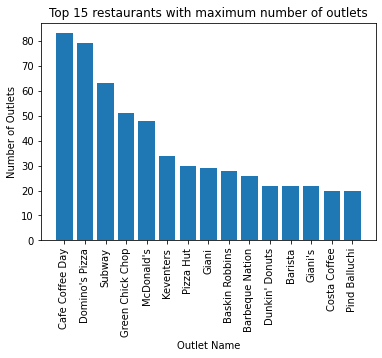

In [82]:
maxOutlets = df['Restaurant Name'].value_counts()[:15]
name = list(maxOutlets.index)
out_count = list(maxOutlets.values)
plt.bar(name,out_count)
plt.xlabel('Outlet Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=90)
plt.title('Top 15 restaurants with maximum number of outlets')
plt.show()

3.2) Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

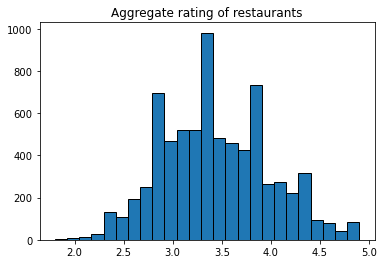

In [113]:
ratings = df['Aggregate rating']
ratings = ratings[ratings>0.0]   # removing unrated restaurant
plt.hist(ratings,edgecolor='black',bins=25)
plt.title('Aggregate rating of restaurants')
plt.show()

3.3) Plot the bar graph top 10 restaurants in the data with the highest number of votes.

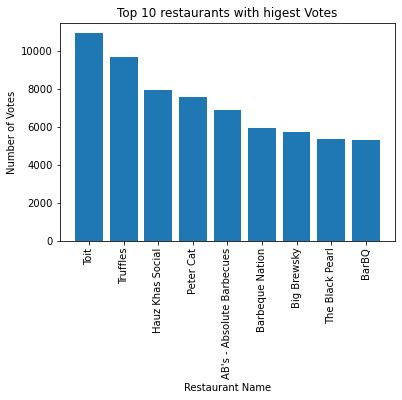

In [127]:
df1 = df.sort_values(by=['Votes'],ascending=False)
rating_votes = df1[['Restaurant Name','Votes']][:10]
rest = rating_votes['Restaurant Name'].values
vot = rating_votes['Votes'].values
plt.bar(rest,vot)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.title('Top 10 restaurants with higest Votes')
plt.show()

3.4) Plot the pie graph of top 10 cuisines present in restaurants in the USA.

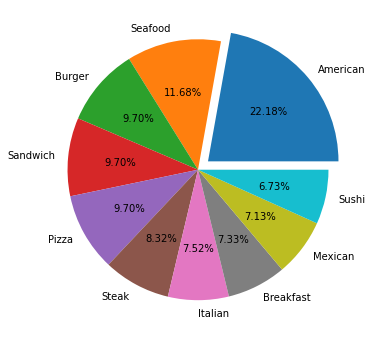

In [142]:
df1 = df[df['Country Code']==216]
df2 = df1['Cuisines']
df2 = df2[df2.isnull()==False]
cus_count={}
for cus in df2:
    for c in cus.split(','):
        c1=c.strip()
        cus_count[c1]=cus_count.get(c1,0)+1
sorted_cus = sorted(cus_count.items(),key = lambda x: -x[1])[:10]
cusine = [i[0] for i in sorted_cus]
count = [i[1] for i in sorted_cus]
explode = [0.1]+[0 for i in range(len(count)-1)]
plt.figure(figsize=(12,6))
plt.pie(count,labels=cusine,explode=explode,autopct="%.2f%%")
plt.show()

3.5) Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

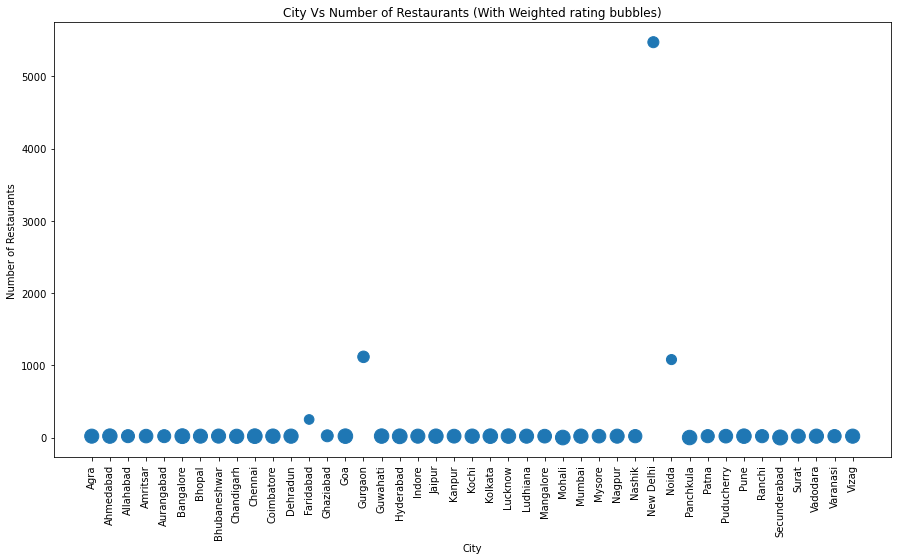

In [165]:
city_count = indian_restaurants[['City','Aggregate rating']]
city_freq={}
city_rat={}
for city,rat in city_count.values:
    city_freq[city]=city_freq.get(city,0)+1
    city_rat[city]=city_rat.get(city,0)+rat
city,rat,count=[],[],[]
for key in city_rat:
    city_rat[key]=city_rat[key]/city_freq[key]
    city.append(key)
    rat.append(city_rat[key]*50)
    count.append(city_freq[key])
plt.figure(figsize=(15,8))
plt.scatter(city,count,rat)
plt.xticks(rotation=90)
plt.title('City Vs Number of Restaurants (With Weighted rating bubbles)')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()